### Getting Data from PostgreSQL DB

Prior to this we have successfull obtained our dataset from Kaggle and migrated it from a `sqlite` database to a `PostgreSQL` database. Now we can query from it using the `psycopg2` package.

#### Required Packages

In [94]:
import pandas as pd       # Data manipulation
import psycopg2           # Query against psql dbs
import numpy as np        # math and arrays
import matplotlib.pyplot as plt # plotting
from scipy import stats # Stats calculations
import seaborn as sns

import custom # team custom library of project functions

#### Create Connection

We stored out data in a `PostgreSQL` database named `soccer`.

In [95]:
conn = psycopg2.connect("dbname=soccer")

---

### Set up queries

We will write queries for each of our proposed hypothesis tests.

#### 1) Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?

In [96]:
query_1 = """
    select
        c.name as country_name
        ,l.name as league_name
        ,ht.team_short_name as home_team_short_name
        ,ht.team_long_name as home_team_long_name
        ,at.team_short_name as away_team_short_name
        ,at.team_long_name as away_team_long_name
        ,m.season, m.stage, m.date, m.match_api_id
        ,m.home_team_goal, m.away_team_goal
        
    from
        match m
        inner join country c on m.country_id = c.id
        inner join league l on m.league_id = l.id
        inner join team ht on m.home_team_api_id = ht.team_api_id
        inner join team at on m.away_team_api_id = at.team_api_id
    ;
"""

### Run queries, put contents into pandas DataFrame

In [97]:
cur = conn.cursor()
cur.execute(query_1)

In [98]:
soccer = pd.DataFrame(cur.fetchall())
soccer.columns = [desc[0] for desc in cur.description]

In [99]:
soccer.head(10).T

,0,1,2,3,4,5,6,7,8,9
country_name,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
league_name,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League
home_team_short_name,GEN,ZUL,CEB,GEN,DEN,MEC,ROS,TUB,WES,CLB
home_team_long_name,KRC Genk,SV Zulte-Waregem,KSV Cercle Brugge,KAA Gent,FCV Dender EH,KV Mechelen,KSV Roeselare,Tubize,KVC Westerlo,Club Brugge KV
away_team_short_name,BAC,LOK,AND,MON,STL,CLB,KOR,MOU,CHA,KOR
away_team_long_name,Beerschot AC,Sporting Lokeren,RSC Anderlecht,RAEC Mons,Standard de Liège,Club Brugge KV,KV Kortrijk,Royal Excel Mouscron,Sporting Charleroi,KV Kortrijk
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1,1,1,1,1,10
date,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-09-24 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-11-01 00:00:00
match_api_id,492473,492474,492475,492476,492477,492478,492479,492480,492481,492564


**Create new column: home team win indicator**

In [100]:
soccer['home_team_wins'] = 0 

In [101]:
soccer.head().T

,0,1,2,3,4
country_name,Belgium,Belgium,Belgium,Belgium,Belgium
league_name,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League
home_team_short_name,GEN,ZUL,CEB,GEN,DEN
home_team_long_name,KRC Genk,SV Zulte-Waregem,KSV Cercle Brugge,KAA Gent,FCV Dender EH
away_team_short_name,BAC,LOK,AND,MON,STL
away_team_long_name,Beerschot AC,Sporting Lokeren,RSC Anderlecht,RAEC Mons,Standard de Liège
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1
date,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-17 00:00:00,2008-08-16 00:00:00
match_api_id,492473,492474,492475,492476,492477


In [102]:
soccer.loc[soccer['home_team_goal'] > soccer['away_team_goal'], 
           ['home_team_wins']] = 1 

In [103]:
soccer.head().T

,0,1,2,3,4
country_name,Belgium,Belgium,Belgium,Belgium,Belgium
league_name,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League
home_team_short_name,GEN,ZUL,CEB,GEN,DEN
home_team_long_name,KRC Genk,SV Zulte-Waregem,KSV Cercle Brugge,KAA Gent,FCV Dender EH
away_team_short_name,BAC,LOK,AND,MON,STL
away_team_long_name,Beerschot AC,Sporting Lokeren,RSC Anderlecht,RAEC Mons,Standard de Liège
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1
date,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-17 00:00:00,2008-08-16 00:00:00
match_api_id,492473,492474,492475,492476,492477


**Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?  
Null Hypothesis: Home teams win less than or equal to  50% of the time.  
Alternative : Home teams win more than 50%.  
One-tail  
Alpha: 0.025**


**Total Games/Population = 25979  
Take sample 1000 games, 100 trials; to calculate sample mean home wins.   
Assuming probability of winning a home game is 50%. Therefor the mean of population home wins is 500.**   

In [104]:
sample_size = 1000
trials = 100

In [105]:
np.random.seed(123)
sample = np.random.choice(soccer['home_team_wins'], size=sample_size, 
                          replace=False)

In [106]:
sample_wins_trial = np.sum(sample)
sample_wins_trial

473

In [107]:
np.random.seed(123)
sample_wins = []
for _ in range(trials):
    sample_wins.append(np.sum(np.random.choice(soccer['home_team_wins'], 
                                           size=sample_size, replace=False)))
    

In [108]:
sample_wins[:10]

[473, 452, 459, 455, 473, 476, 462, 454, 461, 449]

In [109]:
probability_home_win = .50
population_mean = probability_home_win * sample_size
alpha = 0.025

In [110]:
custom.one_sample_ttest(sample_wins, population_mean, alpha=alpha)

Null Hypothesis true.  t-value:  -26.498420571355574 p-value:  9.566056313878305e-47


So we fail to reject the null hypothesis that home teams win less than or equal to 50% of the time. One of the main issues is that we assume the population win percentage is 50%, but that number fails to account for ties.

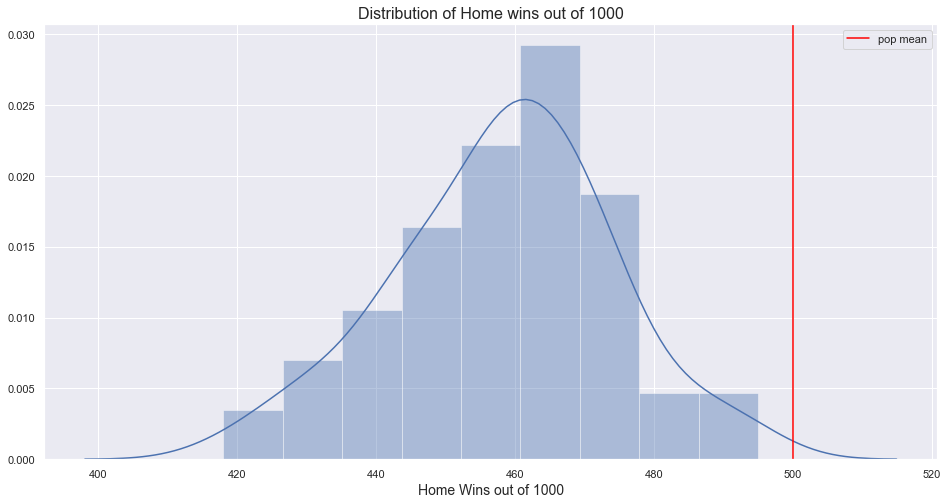

In [113]:
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot(sample_wins)
plt.axvline(x=population_mean, color='red', label='pop mean')
plt.title('Distribution of Home wins out of ' + str(sample_size), fontsize=16)
plt.xlabel('Home Wins out of ' + str(sample_size), fontsize=14)
plt.legend()
plt.show()

**Calculating Cohen's D**

In [112]:
cohen_d = (np.mean(sample_wins) - population_mean
          ) / np.std(sample_wins, ddof=1)
cohen_d

-2.6498420571355576